In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
df = pd.read_csv('../data/raw/ems_2025_merged.csv')
df

c:\Users\ayman\AppData\Local\Programs\Python\Python311\Lib\site-packages\requests\__init__.py:113: RequestsDependencyWarning: urllib3 (2.6.2) or chardet (6.0.0.post1)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(


,incident_id,datetime,initial_type,initial_severity,final_type,final_severity,assignment_time,valid_dispatch_response,dispatch_response_sec,activation_time,...,datetime_hour,datetime_weather,temperture,precipitation,windspeed,weathercode,latitude_of_call,longitude_of_call,closest_station_name,closest_station_manhattan_miles
0,250010001,2025-01-01 00:00:12,STNDBY,8,STNDBY,8,2025-01-01T09:53:41.000,N,0,2025-01-01T09:57:09.000,...,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,40.5771,-73.9881,Engine 318/Ladder 166,0.300912
1,250010003,2025-01-01 00:01:53,UNC,2,UNC,2,2025-01-01T00:02:06.000,Y,13,2025-01-01T00:02:43.000,...,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,40.7506,-73.9971,Engine 34/Ladder 21,0.446225
2,250010004,2025-01-01 00:01:58,CARD,3,CARD,3,2025-01-01T00:01:58.000,Y,0,2025-01-01T00:01:58.000,...,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,40.7590,-73.9899,Battalion 9/Engine 54/Ladder 4,0.280244
3,250010007,2025-01-01 00:03:42,ABDPN,5,ABDPN,5,2025-01-01T00:03:59.000,Y,17,2025-01-01T00:04:12.000,...,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,40.8583,-73.9301,Engine 95/Ladder 36,0.712385
4,250010008,2025-01-01 00:04:36,STATEP,2,STATEP,2,2025-01-01T00:05:06.000,Y,30,2025-01-01T00:05:18.000,...,2025-01-01 00:00:00,2025-01-01 00:00:00,46.8,0.0,10.7,3,40.8899,-73.8466,Battalion 15/Engine 63/Ladder 39,0.668752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616879,243660980,2024-12-31 06:22:21,EDP,7,EDPC,7,NaN,N,0,NaN,...,2024-12-31 06:00:00,2024-12-31 06:00:00,41.8,0.0,8.6,0,40.8469,-73.8976,Bronx Borough Command,0.121764
1616880,243660981,2024-12-31 06:22:47,SICK,6,SICK,6,2024-12-31T06:22:56.000,Y,9,2024-12-31T06:23:14.000,...,2024-12-31 06:00:00,2024-12-31 06:00:00,41.8,0.0,8.6,0,40.6945,-73.9896,Brooklyn Borough Command/Division 11/Battalion...,0.416914
1616881,243660982,2024-12-31 06:23:03,DIFFBR,2,DIFFBR,2,2024-12-31T06:23:24.000,Y,21,2024-12-31T06:24:08.000,...,2024-12-31 06:00:00,2024-12-31 06:00:00,41.8,0.0,8.6,0,40.8899,-73.8466,Battalion 15/Engine 63/Ladder 39,0.668752
1616882,243660983,2024-12-31 06:23:50,EDP,7,EDPM,7,NaN,N,0,NaN,...,2024-12-31 06:00:00,2024-12-31 06:00:00,41.8,0.0,8.6,0,40.8899,-73.8466,Battalion 15/Engine 63/Ladder 39,0.668752


In [2]:
# Random Forest averages all the tree(response) predictions to get the final result (time).
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
df.columns

Index(['incident_id', 'datetime', 'initial_type', 'initial_severity',
       'final_type', 'final_severity', 'assignment_time',
       'valid_dispatch_response', 'dispatch_response_sec', 'activation_time',
       'on_scene_time', 'valid_incident_response', 'travel_time_sec',
       'close_time', 'held', 'disposition', 'borough', 'dispatch_area',
       'zipcode', 'precinct', 'council_district', 'community_district',
       'school_district', 'congressional_district', 'reopened',
       'special_events', 'standby', 'transferred', 'incident_response_sec',
       'to_hospital_time', 'hospital_arrival_time', 'year', 'month', 'day',
       'week_day', 'hour', 'is_weekend', 'is_rush_hour', 'time_of_day',
       'season', 'is_holiday', 'datetime_hour', 'datetime_weather',
       'temperture', 'precipitation', 'windspeed', 'weathercode',
       'latitude_of_call', 'longitude_of_call', 'closest_station_name',
       'closest_station_manhattan_miles'],
      dtype='object')

In [4]:
keep_columns = [
    'closest_station_manhattan_miles',
    'is_weekend',
    'hour',
    'is_holiday',
    'is_rush_hour',
    'initial_severity',
    'borough',
    'zipcode',
    'temperture',
    'precipitation',
    'windspeed',
    'weathercode',
    'day',
    'month',
    'initial_type',
    'dispatch_area',
    'special_events',
    'standby',
    'held',
    'transferred']
categorical_columns = ['borough','is_rush_hour','initial_type','dispatch_area','special_events','standby','held','transferred']


In [5]:
# Winter Model
df_winter = df[df['month'].isin([1, 2, 3])].copy()
df_winter = df_winter[df_winter['incident_response_sec'].notna()]
df_winter = df_winter[df_winter['incident_response_sec'] < 7200]

X_winter = df_winter[keep_columns]

y_winter = df_winter['incident_response_sec']

X_winter_enc = pd.get_dummies(X_winter, columns=categorical_columns, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_winter_enc, y_winter, test_size=0.2, random_state=42)


winter_model = RandomForestRegressor(n_estimators=10,
                                     max_depth=15,
                                     min_samples_leaf=200,
                                     min_samples_split=100, 
                                     random_state=42, 
                                     n_jobs=-1)
winter_model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",10
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",15
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",100
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",200
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsampl

In [6]:
print(X_winter.columns.tolist())

['closest_station_manhattan_miles', 'is_weekend', 'hour', 'is_holiday', 'is_rush_hour', 'initial_severity', 'borough', 'zipcode', 'temperture', 'precipitation', 'windspeed', 'weathercode', 'day', 'month', 'initial_type', 'dispatch_area', 'special_events', 'standby', 'held', 'transferred']


In [7]:
winter_train_pred = winter_model.predict(X_train)
winter_train_rmse = np.sqrt(mean_squared_error(y_train, winter_train_pred))

In [8]:
winter_test_pred = winter_model.predict(X_test)
winter_test_rmse = np.sqrt(mean_squared_error(y_test, winter_test_pred))

In [9]:
print(f"Winter Training RMSE: {winter_train_rmse:}")
print(f"Winter Test RMSE: {winter_test_rmse:}")
print(f"Difference: {winter_test_rmse - winter_train_rmse:}sec")

Winter Training RMSE: 601.1645619899969
Winter Test RMSE: 610.5910907607457
Difference: 9.42652877074886sec


In [10]:
winter_comparison = pd.DataFrame({
    'actual': y_test.values[:10],
    'predicted': winter_test_pred[:10],
    'error': y_test.values[:10] - winter_test_pred[:10]})


winter_comparison

,actual,predicted,error
0,381.0,498.362906,-117.362906
1,772.0,863.161027,-91.161027
2,601.0,480.993944,120.006056
3,1210.0,1741.070402,-531.070402
4,329.0,320.719670,8.280330
5,347.0,417.378465,-70.378465
6,218.0,553.060852,-335.060852
7,326.0,425.723525,-99.723525
8,724.0,432.499767,291.500233
9,732.0,491.794114,240.205886


In [11]:
# Spring Model
df_spring = df[df['month'].isin([4, 5, 6])].copy()
df_spring = df_spring[df_spring['incident_response_sec'].notna()] # since so much data i just used what was na
df_spring = df_spring[df_spring['incident_response_sec'] < 7200]

X_spring = df_spring[keep_columns]
y_spring = df_spring['incident_response_sec']

X_spring_enc = pd.get_dummies(X_spring, columns=categorical_columns, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X_spring_enc, y_spring, test_size=0.2, random_state=42)


spring_model = RandomForestRegressor(n_estimators=10, 
                                     max_depth=15,
                                     min_samples_split=100,
                                     min_samples_leaf=200,
                                     random_state=42, 
                                     n_jobs=-1)
spring_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",10
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",15
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",100
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",200
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsampl

In [12]:
print(X_spring.columns.tolist())

['closest_station_manhattan_miles', 'is_weekend', 'hour', 'is_holiday', 'is_rush_hour', 'initial_severity', 'borough', 'zipcode', 'temperture', 'precipitation', 'windspeed', 'weathercode', 'day', 'month', 'initial_type', 'dispatch_area', 'special_events', 'standby', 'held', 'transferred']


In [13]:
spring_train_pred = spring_model.predict(X_train)
spring_train_rmse = np.sqrt(mean_squared_error(y_train, spring_train_pred))

In [14]:
spring_test_pred = spring_model.predict(X_test)
spring_test_rmse = np.sqrt(mean_squared_error(y_test, spring_test_pred))

In [15]:
print(f" Spring training RMSE: {spring_train_rmse} sec")
print(f"spring test RMSE: {spring_test_rmse:} sec")
print(f"Difference: {spring_test_rmse - spring_train_rmse:} sec")

 Spring training RMSE: 615.1185949235042 sec
spring test RMSE: 626.243244760977 sec
Difference: 11.124649837472703 sec


In [16]:
spring_comparison = pd.DataFrame({
    'actual': y_test.values[:10],
    'predicted': spring_test_pred[:10],
    'error': y_test.values[:10] - spring_test_pred[:10]})


spring_comparison

,actual,predicted,error
0,244.0,421.935559,-177.935559
1,569.0,677.724532,-108.724532
2,593.0,558.724199,34.275801
3,483.0,530.223024,-47.223024
4,141.0,471.035658,-330.035658
5,998.0,665.343566,332.656434
6,367.0,412.110498,-45.110498
7,828.0,748.908900,79.091100
8,631.0,839.160635,-208.160635
9,284.0,543.623602,-259.623602


In [17]:
# Summer model
df_summer = df[df['month'].isin([7,8,9])].copy() 
df_summer = df_summer[df_summer['incident_response_sec'].notna()]
df_summer = df_summer[df_summer['incident_response_sec']< 7200]

X_summer = df_summer[keep_columns]
y_summer = df_summer['incident_response_sec']

X_summer_enc = pd.get_dummies(X_summer, columns=categorical_columns, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_summer_enc,y_summer, random_state=42, test_size=0.2)

summer_model = RandomForestRegressor(n_estimators=10,
                                     min_samples_leaf=100,
                                     min_samples_split=200,
                                     max_depth=15,
                                     random_state=42,
                                     n_jobs=-1)
summer_model.fit(X_train,y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",10
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",15
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",200
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",100
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsampl

In [18]:
print(X_summer.columns.tolist())

['closest_station_manhattan_miles', 'is_weekend', 'hour', 'is_holiday', 'is_rush_hour', 'initial_severity', 'borough', 'zipcode', 'temperture', 'precipitation', 'windspeed', 'weathercode', 'day', 'month', 'initial_type', 'dispatch_area', 'special_events', 'standby', 'held', 'transferred']


In [19]:
summer_train_pred = summer_model.predict(X_train)
summer_train_rmse = np.sqrt(mean_squared_error(y_train, summer_train_pred))

In [20]:
summer_test_pred = summer_model.predict(X_test)
summer_test_rmse = np.sqrt(mean_squared_error(y_test, summer_test_pred))

In [21]:
print(f" Summer training RMSE: {summer_train_rmse} sec")
print(f"summer test RMSE: {summer_test_rmse} sec")
print(f"Difference: {summer_test_rmse - summer_train_rmse:} sec")

 Summer training RMSE: 644.4896922442671 sec
summer test RMSE: 670.5377253283472 sec
Difference: 26.04803308408009 sec


In [22]:
summer_comparison = pd.DataFrame({
    'actual': y_test.values[:10],
    'predicted': summer_test_pred[:10],
    'error': y_test.values[:10] - summer_test_pred[:10]})


summer_comparison

,actual,predicted,error
0,120.0,596.364022,-476.364022
1,676.0,766.721481,-90.721481
2,1720.0,1527.880200,192.119800
3,265.0,373.869353,-108.869353
4,2965.0,2672.698445,292.301555
5,291.0,415.298406,-124.298406
6,609.0,437.315247,171.684753
7,649.0,578.340188,70.659812
8,186.0,302.615275,-116.615275
9,339.0,386.091722,-47.091722


In [23]:
# Fall Model
df_fall = df[df['month'].isin([10, 11, 12])].copy()
df_fall = df_fall[df_fall['incident_response_sec'].notna()]
df_fall = df_fall[df_fall['incident_response_sec'] < 7200]

X_fall = df_fall[keep_columns]
y_fall = df_fall['incident_response_sec']

X_fall_enc = pd.get_dummies(X_fall, columns=categorical_columns, drop_first=True)


#X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
X_train, X_test, y_train, y_test = train_test_split(X_fall_enc, y_fall, test_size=0.2, random_state=42)


fall_model = RandomForestRegressor(n_estimators=10,
                                   max_depth=15,
                                   min_samples_leaf=200,
                                   min_samples_split=100, 
                                   random_state=42, 
                                   n_jobs=-1)
fall_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",10
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",15
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",100
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",200
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsampl

In [24]:
print(X_fall.columns.tolist())

['closest_station_manhattan_miles', 'is_weekend', 'hour', 'is_holiday', 'is_rush_hour', 'initial_severity', 'borough', 'zipcode', 'temperture', 'precipitation', 'windspeed', 'weathercode', 'day', 'month', 'initial_type', 'dispatch_area', 'special_events', 'standby', 'held', 'transferred']


In [25]:
fall_train_pred = fall_model.predict(X_train)
fall_train_rmse = np.sqrt(mean_squared_error(y_train, fall_train_pred))

In [26]:
fall_test_pred = fall_model.predict(X_test)
fall_test_rmse = np.sqrt(mean_squared_error(y_test, fall_test_pred))

In [27]:
print(f" Fall training RMSE: {fall_train_rmse:} sec")
print(f"Fall test RMSE: {fall_test_rmse:} sec")
print(f"Difference: {fall_test_rmse - fall_train_rmse:} sec")

 Fall training RMSE: 599.5083309468563 sec
Fall test RMSE: 593.2145735951981 sec
Difference: -6.293757351658201 sec


In [28]:
fall_comparison = pd.DataFrame({
    'actual': y_test.values[:10],
    'predicted': fall_test_pred[:10],
    'error': y_test.values[:10] - fall_test_pred[:10]})


fall_comparison

,actual,predicted,error
0,408.0,404.059917,3.940083
1,975.0,760.349548,214.650452
2,479.0,464.757630,14.242370
3,2488.0,3237.224541,-749.224541
4,206.0,718.310666,-512.310666
5,751.0,1880.075399,-1129.075399
6,423.0,451.238380,-28.238380
7,842.0,497.821141,344.178859
8,387.0,476.998402,-89.998402
9,0.0,501.812943,-501.812943


In [29]:
average_test_rmse = (winter_test_rmse + spring_test_rmse + summer_test_rmse + fall_test_rmse) / 4 # divided by 4 seasons to ger average
average_train_rmse = (winter_train_rmse + spring_train_rmse + summer_test_rmse + fall_test_rmse) /4

In [30]:
print(f"Training RMSE: {average_train_rmse:} sec")
print(f"Test RMSE: {average_test_rmse:} sec")
print(f"Difference: {average_test_rmse - average_train_rmse} sec")

Training RMSE: 620.0088639592616 sec
Test RMSE: 625.146658611317 sec
Difference: 5.1377946520553905 sec


In [31]:
# first try 17 min is bad (bad date set)
# second try is 11 minutes lowered the time less than 2 hours (used less than 2 hours)
# third try with new data set 13 min
# fourth try 12 min using by season winter
# once broken down by season i got better results 15 min avg response time
# with 3 seasons is it still posibile to show case this 
# possible hypothesis testing 
# 10 second imporovement by adding is_holiday to the model really good sign the model is learning
# tweeked the model max dept ect.

In [32]:
overall_avg = df['incident_response_sec'].mean()
print(f"\nOverall Average: {overall_avg/60:.2f} minutes")



Overall Average: 14.91 minutes


-----------------------------------------------------------------------------------------------------------------------------------------------------------

hypothesis testing

In [33]:
#t here is no difference in mean emergency response times across seasons (winter, spring, summer)
# if i fill in the mean my hypothesis could be invalid so dropna() and keep what i have for the test 
# questioning why they are different and how they are different 
# can i prove that the response time is even valid across season weather holidays ect. 

In [34]:
# Can you export your Random Forest predictions aggregated at the hourly level 
# as a CSV with datetime_hour and rf_pred_response_sec? I need it for Tableau.

In [35]:
from scipy import stats

winter = df[df['season'] == 'winter']['incident_response_sec'].dropna()
spring = df[df['season'] == 'spring']['incident_response_sec'].dropna()
summer = df[df['season'] == 'summer']['incident_response_sec'].dropna()
fall = df[df['season'] == 'fall']['incident_response_sec'].dropna()

f_stat, p_value = stats.f_oneway( winter,  spring,  summer, fall ) 
# EASY 

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

#0.05 is the standard threshold
if p_value < 0.05:
    print("seasons have different response times")
else:
    print("Response times are the same across winter/spring/summer")

F-statistic: 1407.9921879393653
P-value: 0.0
seasons have different response times


In [36]:
# response times are different across seasons

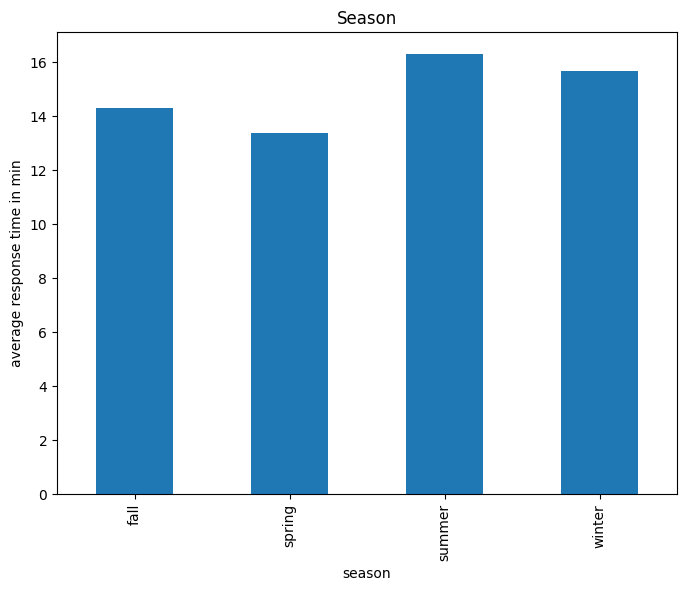

In [37]:
means = df.groupby('season')['incident_response_sec'].mean() / 60

plt.figure(figsize=(8, 6))
means.plot(kind='bar')
plt.ylabel('average response time in min')
plt.title('Season')
plt.show()

In [38]:
# can you export your Random Forest predictions aggregated at the hourly level as 
# a CSV with datetime_hour and rf_pred_response_sec? I need it for Tableau
# all outputs on csv for utku

In [39]:
import os
import pickle

os.makedirs("../data/models", exist_ok=True)

models = {
    "winter": winter_model,
    "spring": spring_model,
    "summer": summer_model,
    "fall": fall_model}

with open("../data/models/season_models.pkl", "wb") as f:
    pickle.dump(models, f)


-------------------------------------------------------------------------------------------------------------------------------------------------------

In [40]:
all_predictions = []
# winter
X_train, X_test, y_train, y_test = train_test_split(X_winter_enc, y_winter, test_size=0.2, random_state=42)
winter_preds = winter_model.predict(X_test)
winter_dates = df_winter.loc[y_test.index, 'datetime'].values
all_predictions.append(pd.DataFrame({'datetime': winter_dates,'rf_pred_response_sec': winter_preds}))
# spring
X_train, X_test, y_train, y_test = train_test_split(X_spring_enc, y_spring, test_size=0.2, random_state=42)
spring_preds = spring_model.predict(X_test)
spring_dates = df_spring.loc[y_test.index, 'datetime'].values
all_predictions.append(pd.DataFrame({'datetime': spring_dates,'rf_pred_response_sec': spring_preds}))
# summer
X_train, X_test, y_train, y_test = train_test_split(X_summer_enc, y_summer, test_size=0.2, random_state=42)
summer_preds = summer_model.predict(X_test)
summer_dates = df_summer.loc[y_test.index, 'datetime'].values
all_predictions.append(pd.DataFrame({'datetime': summer_dates,'rf_pred_response_sec': summer_preds}))
# fall
X_train, X_test, y_train, y_test = train_test_split(X_fall_enc, y_fall, test_size=0.2, random_state=42)
fall_preds = fall_model.predict(X_test)
fall_dates = df_fall.loc[y_test.index, 'datetime'].values
all_predictions.append(pd.DataFrame({'datetime': fall_dates,'rf_pred_response_sec': fall_preds}))
    

In [41]:
combined = pd.concat(all_predictions, ignore_index=True)
combined['datetime_hour'] = pd.to_datetime(combined['datetime']).dt.floor('H')
hourly_preds = combined.groupby('datetime_hour')['rf_pred_response_sec'].mean().reset_index()
hourly_preds = hourly_preds.sort_values('datetime_hour').reset_index(drop=True)

C:\Users\ayman\AppData\Local\Temp\ipykernel_13240\4173566753.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  combined['datetime_hour'] = pd.to_datetime(combined['datetime']).dt.floor('H')


In [42]:
hourly_preds

,datetime_hour,rf_pred_response_sec
0,2024-09-01 00:00:00,699.621980
1,2024-09-01 01:00:00,817.548291
2,2024-09-01 02:00:00,817.265180
3,2024-09-01 03:00:00,696.186797
4,2024-09-01 04:00:00,1010.834855
...,...,...
8754,2025-08-31 19:00:00,894.669704
8755,2025-08-31 20:00:00,786.877728
8756,2025-08-31 21:00:00,738.989154
8757,2025-08-31 22:00:00,675.394976


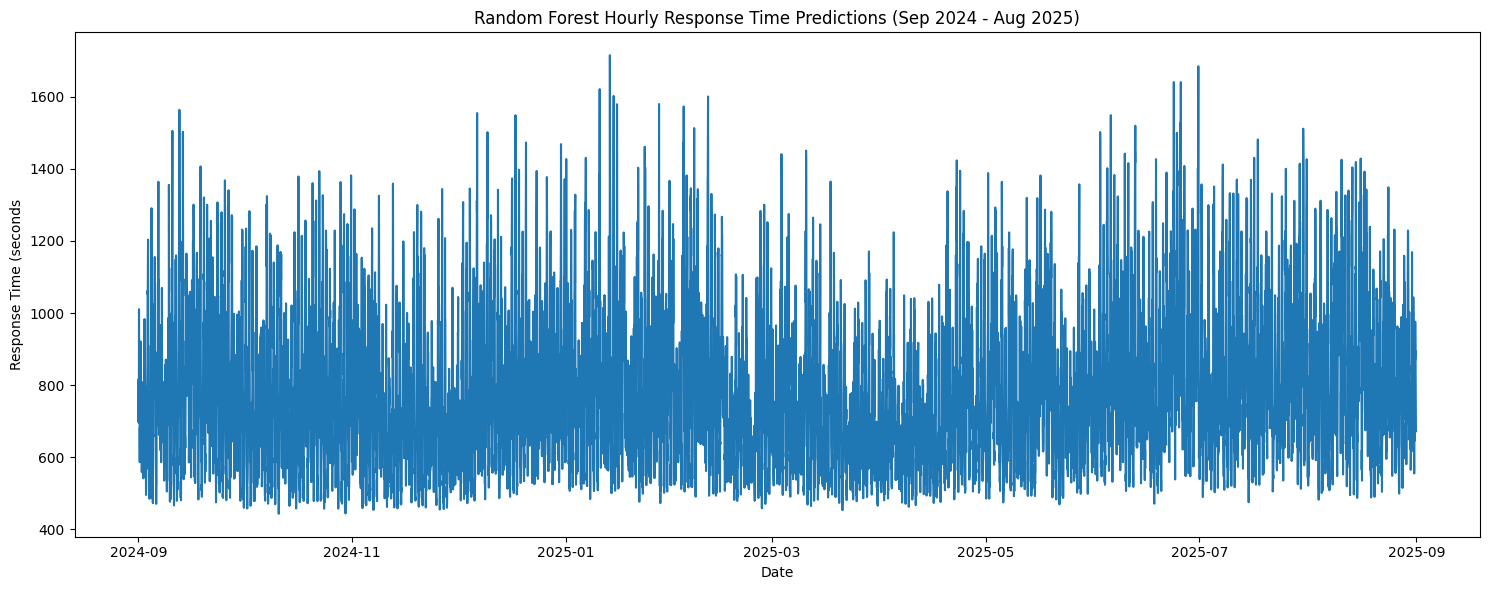

In [43]:
plt.figure(figsize=(15, 6))
plt.plot(hourly_preds['datetime_hour'], hourly_preds['rf_pred_response_sec'])
plt.xlabel('Date')
plt.ylabel('Response Time (seconds')
plt.title('Random Forest Hourly Response Time Predictions (Sep 2024 - Aug 2025)')
plt.tight_layout()
plt.show()

In [44]:

X_train, X_test, y_train, y_test = train_test_split(X_winter_enc, y_winter, test_size=0.2, random_state=42)
winter_preds = winter_model.predict(X_test)

y_test_winter = y_test


X_train, X_test, y_train, y_test = train_test_split(X_spring_enc, y_spring, test_size=0.2, random_state=42)
spring_preds = spring_model.predict(X_test)

y_test_spring = y_test


X_train, X_test, y_train, y_test = train_test_split(X_summer_enc, y_summer, test_size=0.2, random_state=42)
summer_preds = summer_model.predict(X_test)

y_test_summer = y_test


X_train, X_test, y_train, y_test = train_test_split(X_fall_enc, y_fall, test_size=0.2, random_state=42)
fall_preds = fall_model.predict(X_test)

y_test_fall = y_test

In [45]:
# create a list to show
seasons = [
    ("winter", y_test_winter, winter_preds),
    ("spring", y_test_spring, spring_preds),
    ("summer", y_test_summer, summer_preds),
    ("fall",   y_test_fall,   fall_preds)]

In [46]:
print(type(seasons))

<class 'list'>


In [47]:
for name, y_true, y_pred in seasons:
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    print(f"{name}      RMSE: {rmse} sec        MAE: {mae} sec          R2: {r2} sec")

winter      RMSE: 610.5910907607457 sec        MAE: 351.2136855013717 sec          R2: 0.4811789311102733 sec
spring      RMSE: 626.243244760977 sec        MAE: 363.24367981958466 sec          R2: 0.45690750503656996 sec
summer      RMSE: 670.5377253283472 sec        MAE: 387.4970002311654 sec          R2: 0.46243063180325916 sec
fall      RMSE: 593.2145735951981 sec        MAE: 345.50956735271717 sec          R2: 0.4680778015999816 sec


In [48]:
hourly_preds.to_csv('../data/raw/hourly_rf_predictions.csv', index=False)

-----------------------------------------------------------------------------------------------------------------------------------------------------------

# streamlit request

In [57]:
# Average response time by hour and borough in minutes

hourly_location_avg = df.groupby(['hour', 'borough'])['incident_response_sec'].agg(avg_response_sec='mean',incident_count='count').reset_index()

hourly_location_avg['response_time_min'] = round(hourly_location_avg['avg_response_sec'] / 60, 2)
hourly_location_avg = hourly_location_avg.drop(columns='avg_response_sec')

hourly_location_avg

,hour,borough,incident_count,response_time_min
0,0,BRONX,12854,12.64
1,0,BROOKLYN,15670,14.35
2,0,MANHATTAN,13343,21.48
3,0,QUEENS,11284,13.75
4,0,RICHMOND / STATEN ISLAND,2041,12.35
...,...,...,...,...
117,23,BRONX,14125,11.76
118,23,BROOKLYN,16619,10.94
119,23,MANHATTAN,13932,13.64
120,23,QUEENS,12246,9.78


In [61]:
# monthly response time by in minutes
monthly_location_avg = df.groupby(['month', 'borough'])['incident_response_sec'].agg(avg_response_sec='mean',incident_count='count').reset_index()

# monthly_location_avg = df.groupby(['month', 'borough'])['incident_response_sec'].agg(
#     avg_response_sec='mean',
monthly_location_avg['avg_response_min'] = round(monthly_location_avg['avg_response_sec'] / 60, 2)
monthly_location_avg = monthly_location_avg.drop(columns='avg_response_sec')

monthly_location_avg

,month,borough,incident_count,avg_response_min
0,1,BRONX,30297,24.79
1,1,BROOKLYN,36726,13.62
2,1,MANHATTAN,29731,15.64
3,1,QUEENS,27045,12.32
4,1,RICHMOND / STATEN ISLAND,5751,10.14
...,...,...,...,...
57,12,BRONX,30435,21.67
58,12,BROOKLYN,35781,12.36
59,12,MANHATTAN,30490,17.02
60,12,QUEENS,27737,11.56


In [65]:
monthly_location_avg.to_csv('../data/raw/monthly_location_avg.csv', index=False)
hourly_location_avg.to_csv('../data/raw/hourly_location_avg.csv', index=False)